## Notebook imports and packages

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colormap

from sympy import symbols,diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example-1
## $$f(x)=x^2+x+1$$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
# make data

x = np.linspace(start=-3,stop=3,num=500)

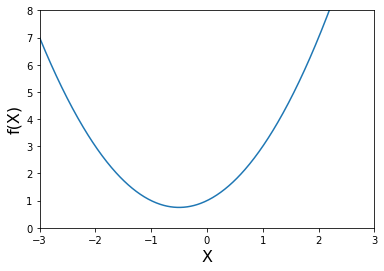

In [4]:
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x,f(x))
plt.show()

## slope and derivatives

In [5]:
def df(x):
    return 2*x+1

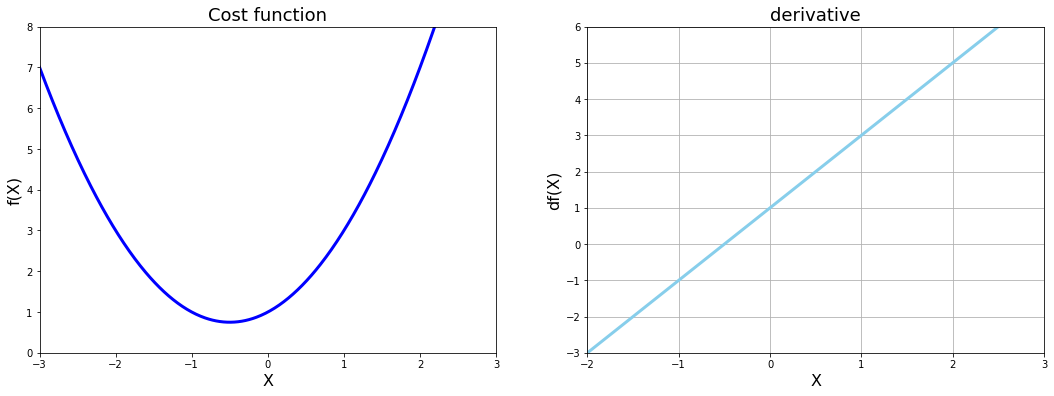

In [6]:
# cost function ans derivative side by side

plt.figure(figsize=[18,6])

# chart 1: cost function

plt.subplot(1,2,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x,f(x),color='blue',linewidth=3)

#chart 2: derivatives

plt.subplot(1,2,2)
plt.title('derivative',fontsize=18)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=16)
plt.grid()
plt.plot(x,df(x),color='skyblue',linewidth=3)

plt.show()

## Gradient Descent

In [7]:
def gradient_descent(derivative_fun,initial_guess,multiplier=0.1,precision=0.001, max_iter= 500):
    
    new_x = initial_guess
    x_list=[new_x]
    slope_list=[derivative_fun(new_x)]

    for n in range(max_iter):
        privious_x = new_x
        gradient = derivative_fun(privious_x)
        new_x = privious_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        step_size = abs(new_x-privious_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

new_x, x_list, slope_list = gradient_descent(derivative_fun=df,initial_guess=3)
print('local minima: ',new_x)
print('Number of steps: ',len(x_list))

local minima:  -0.4965337678900009
Number of steps:  32


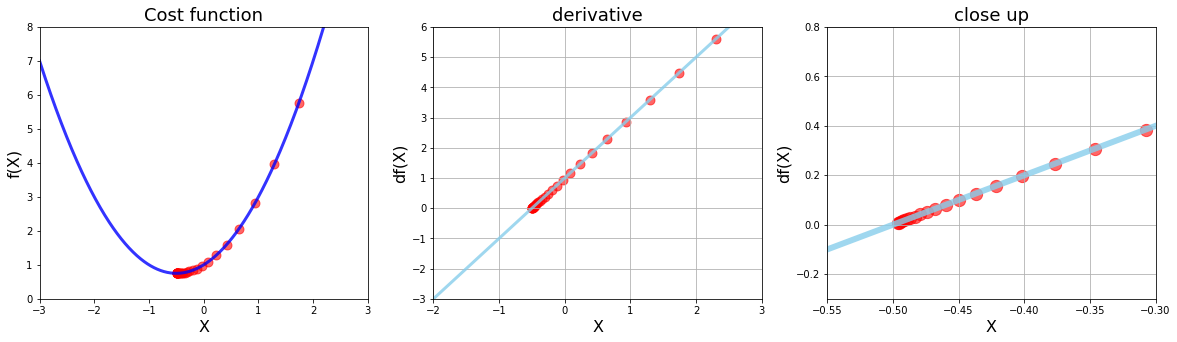

In [8]:
# cost function ans derivative side by side

plt.figure(figsize=[20,5])

# chart 1: cost function
plt.subplot(1,3,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x,f(x),color='blue',linewidth=3,alpha=0.8)
plt.scatter(x_list,f(np.array(x_list)),color='red',s=80,alpha=0.6)

#chart 2: derivatives
plt.subplot(1,3,2)
plt.title('derivative',fontsize=18)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=16)
plt.grid()
plt.plot(x,df(x),color='skyblue',linewidth=3,alpha=0.8)
plt.scatter(x_list,slope_list,color='red',s=80,alpha=0.6)

#chart 3:close up of derivative
plt.subplot(1,3,3)
plt.title('close up',fontsize=18)
plt.xlim(-0.55,-0.3)
plt.ylim(-0.3,0.8)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=16)
plt.grid()
plt.plot(x,df(x),color='skyblue',linewidth=6,alpha=0.8)
plt.scatter(x_list,slope_list,color='red',s=150,alpha=0.6)

plt.show()

## Example 2 - Multiple Minima & Initial Guess & Adanced Functions
### $$f(x)=x^4-4x^2+5$$

In [9]:
# make data
x_2 = np.linspace(start=-2,stop=2,num=1000)

In [10]:
# function
def g(x):
    return x**4 - 4*x**2 + 5

In [11]:
# derivative
def dg(x):
    return 4*x**3 - 8*x

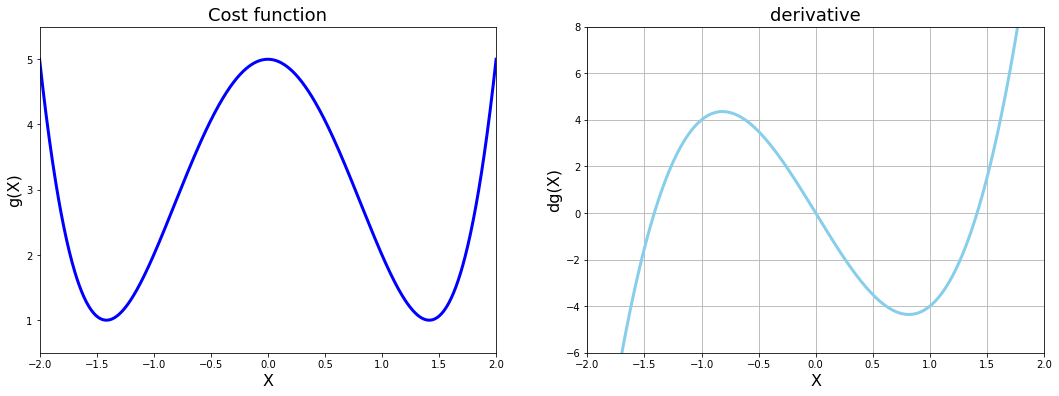

In [12]:
# cost function ans derivative side by side

plt.figure(figsize=[18,6])

# chart 1: cost function

plt.subplot(1,2,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(X)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

#chart 2: derivatives

plt.subplot(1,2,2)
plt.title('derivative',fontsize=18)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(X)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3)

plt.show()

In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun=dg,initial_guess=0.1,multiplier=0.01,precision=0.0001)
print('local minima: ',local_min)
print('number of stpes: ',len(list_x))

local minima:  1.413709226894381
number of stpes:  77


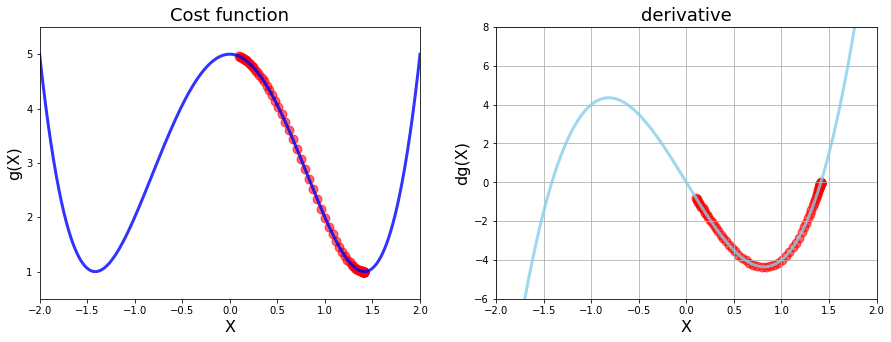

In [14]:
# cost function ans derivative side by side

plt.figure(figsize=[15,5])

# chart 1: cost function
plt.subplot(1,2,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(X)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=80,alpha=0.6)

#chart 2: derivatives
plt.subplot(1,2,2)
plt.title('derivative',fontsize=18)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(X)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=80,alpha=0.6)

plt.show()

## Example- 3 Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [15]:
#make data
x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

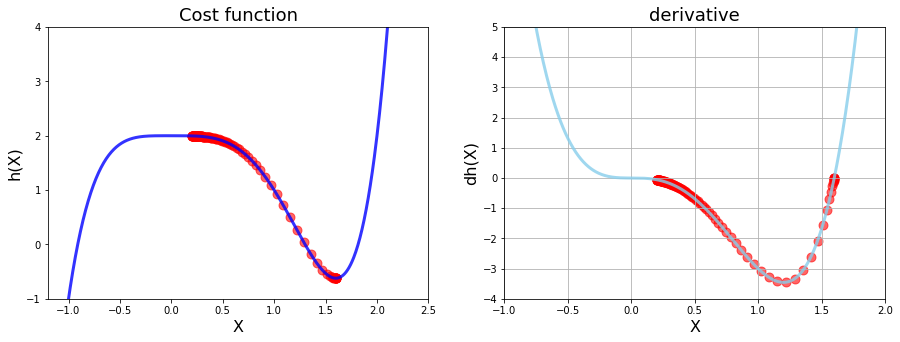

local minima:  1.5998724702484226
cost at this minima:  -0.6214398334848514
number of stpes:  121


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun=dh,initial_guess=0.2,multiplier=0.02,precision=0.0001)
# cost function ans derivative side by side

plt.figure(figsize=[15,5])

# chart 1: cost function
plt.subplot(1,2,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(X)',fontsize=16)
plt.plot(x_3,h(x_3),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=80,alpha=0.6)

#chart 2: derivatives
plt.subplot(1,2,2)
plt.title('derivative',fontsize=18)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(X)',fontsize=16)
plt.grid()
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=3,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=80,alpha=0.6)

plt.show()

print('local minima: ',local_min)
print('cost at this minima: ',h(local_min))
print('number of stpes: ',len(list_x))

In [17]:
import sys
#help(sys)
#sys.version
sys.float_info.max

1.7976931348623157e+308

##  The Learning rate

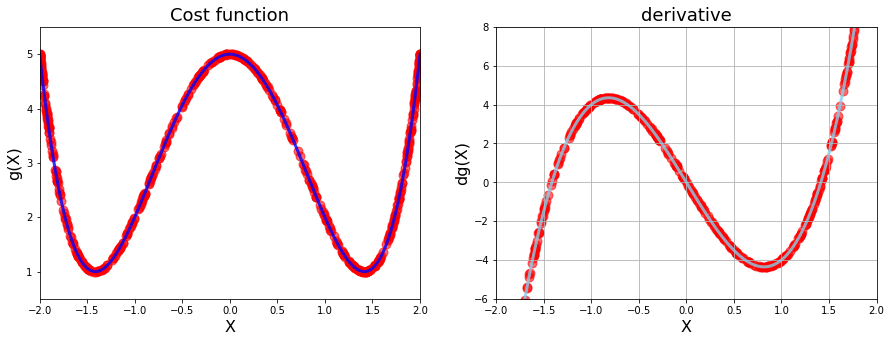

number of steps:  501


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun=dg,initial_guess=1.9,multiplier=0.25,precision=0.0001
                                                ,max_iter=500)

# cost function ans derivative side by side

plt.figure(figsize=[15,5])

# chart 1: cost function
plt.subplot(1,2,1)
plt.title('Cost function',fontsize=18)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(X)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=80,alpha=0.6)

#chart 2: derivatives
plt.subplot(1,2,2)
plt.title('derivative',fontsize=18)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(X)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=80,alpha=0.6)

plt.show()

print('number of steps: ',len(list_x))

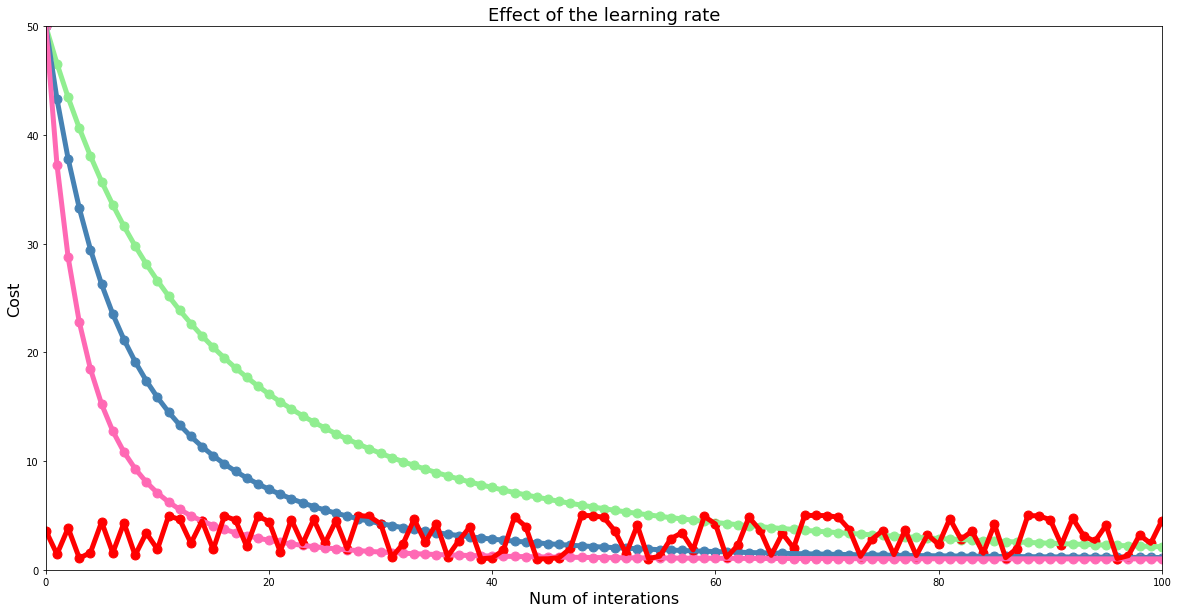

In [19]:
# run gradient descent 3 times

n=100
low_gamma = gradient_descent(derivative_fun=dg,initial_guess=3,multiplier=0.0005,precision=0.0001
                                                ,max_iter=n)
mid_gamma = gradient_descent(derivative_fun=dg,initial_guess=3,multiplier=0.001,precision=0.0001
                                                ,max_iter=n)
high_gamma = gradient_descent(derivative_fun=dg,initial_guess=3,multiplier=0.002,precision=0.0001
                                                ,max_iter=n)
# Experiment
insane_gamma = gradient_descent(derivative_fun=dg,initial_guess=1.9,multiplier=0.25,precision=0.0001
                                                ,max_iter=n)

# cost function ans derivative side by side

plt.figure(figsize=[20,10])

plt.title('Effect of the learning rate',fontsize=18)
plt.xlim(0,n)
plt.ylim(0,50)
plt.xlabel('Num of interations',fontsize=16)
plt.ylabel('Cost',fontsize=16)

# values for our chart
# X-Axis data:
interation_list=list(range(0,n+1))

# plotting low learing rate
plt.plot(interation_list,g(np.array(low_gamma[1])),color='lightgreen',linewidth=5)
plt.scatter(interation_list,g(np.array(low_gamma[1])),color='lightgreen',s=80)

# plotting mid learing rate
plt.plot(interation_list,g(np.array(mid_gamma[1])),color='steelblue',linewidth=5)
plt.scatter(interation_list,g(np.array(mid_gamma[1])),color='steelblue',s=80)

# plotting high learing rate
plt.plot(interation_list,g(np.array(high_gamma[1])),color='hotpink',linewidth=5)
plt.scatter(interation_list,g(np.array(high_gamma[1])),color='hotpink',s=80)

# plotting insane learing rate
plt.plot(interation_list,g(np.array(insane_gamma[1])),color='red',linewidth=5)
plt.scatter(interation_list,g(np.array(insane_gamma[1])),color='red',s=80)

plt.show()

## Example- 4 Data Viz and 3D Charts
## Minimise
## $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
### Minimise 
### $$f(x, y) = \frac{1}{r + 1}$$
### Where r is $3^{-x^2-y^2}$

In [20]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [21]:
# make our x and y data

x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

x_4, y_4 = np.meshgrid(x_4, y_4)

print(x_4.shape)

(200, 200)


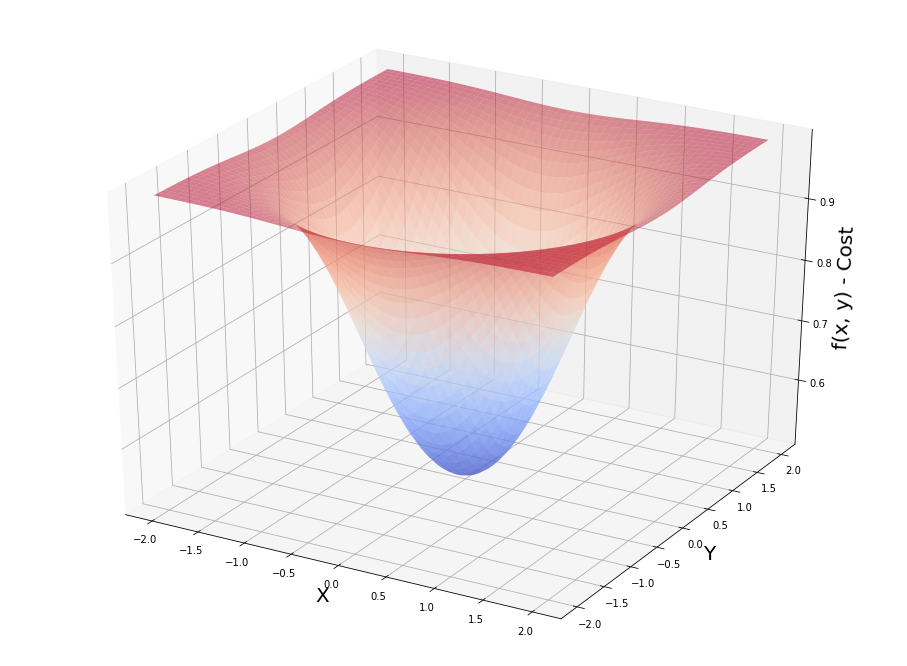

In [22]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x, y) - Cost',fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)

plt.show()

## Partial Derivatives And Symbolic Computation
## $$\frac {\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} + 1\right)}$$
## $$\frac {\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} + 1\right)}$$

In [23]:
a, b = symbols('x, y')
print('Our cost function f(x, y) = ',f(a, b))
print('Partial derivaties wrt x is = ',diff(f(a, b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is =',f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivaties wrt x =',diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) =  1/(3**(-x**2 - y**2) + 1)
Partial derivaties wrt x is =  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is = 0.990604794032582
Value of partial derivaties wrt x = 0.0368089716197505


In [24]:
# partial derivaties function ex-4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

## Batch Gradient Descent with Sympy

In [25]:
# setup with sympy

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# result
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [26]:
# Advanced Numpy Array Practice:

krik = np.array([['Captian', 'Guitar']])
print(krik.shape)

hs_band = np.array([['Blakc Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]',hs_band[0])
print('hs_band[0][1]',hs_band[0][1])

the_roots = np.append(arr=hs_band , values=krik , axis=0)
print(the_roots)

print('Printing nickname...  ',the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('printing band roles...  ',the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] ['Blakc Thought' 'MC']
hs_band[0][1] MC
[['Blakc Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captian' 'Guitar']]
Printing nickname...   ['Blakc Thought' 'Questlove' 'Captian']
printing band roles...   ['MC' 'Drums' 'Guitar' 'MC']


In [27]:
# setup with user def func

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2),axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# result
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


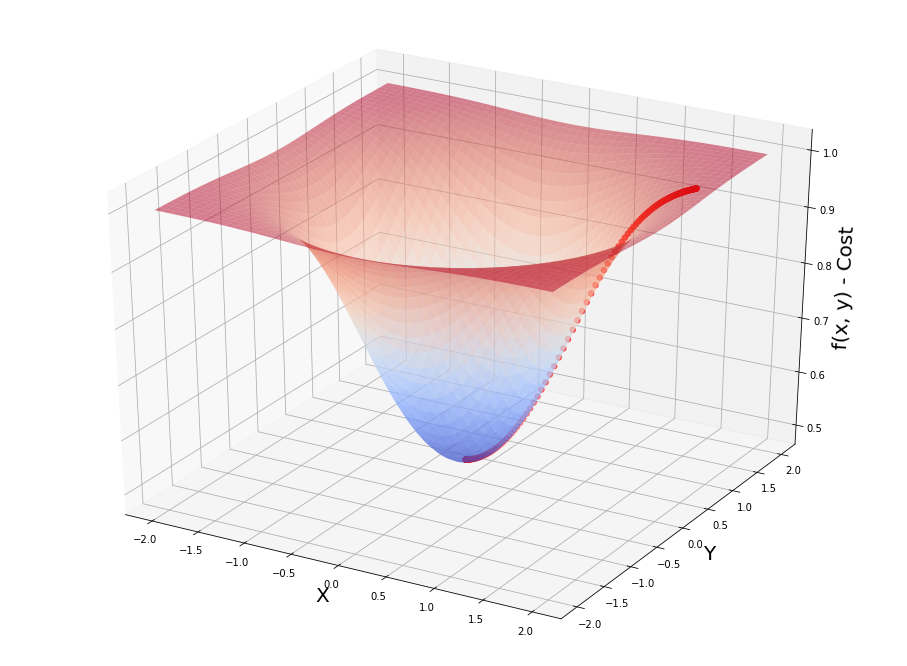

In [28]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x, y) - Cost',fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), color='red', s=30)

plt.show()

## Exampl- 5 Working with Data & a Real Cost Function
### Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \hat y \big)^2$$

In [29]:
# Make sample data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5: ',x_5.shape)
print('Shape of y_5: ',y_5.shape)

Shape of x_5:  (7, 1)
Shape of y_5:  (7, 1)


In [30]:
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0: ',regr.intercept_[0])
print('Theta 1: ',regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


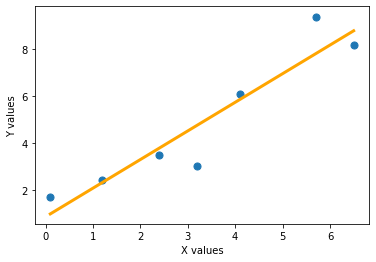

In [31]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [100]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5

print('Est values y_hat are:\n', y_hat)
print('In comparison, actual y values are:\n',y_5)

Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, actual y values are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [106]:
def mse(y, y_hat):
    mse_clac = (1/(y.size)) * sum((y - y_hat)**2)
    #mse_clac = np.average((y - y_hat)**2, axis=0)
    return mse_clac

In [107]:
mse(y_5, y_hat)

array([0.94796558])

In [108]:
print('Manuallly calculated MSE is: ',mse(y_5, y_hat))
print('MSE regression using manual calc is: ',mean_squared_error(y_5, y_hat))
print('MSE regression is: ',mean_squared_error(y_5, regr.predict(x_5)))

Manuallly calculated MSE is:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make Data for Thetas

In [109]:
nr_theta = 200
th_0 = np.linspace(-1, 3, nr_theta)
th_1 = np.linspace(-1, 3, nr_theta)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Clac MSE using Nested For Loops

In [110]:
# Nested loop practice
for i in range(2):
    for j in range(2):
        print(f'value of i in {i} and j in {j}')

value of i in 0 and j in 0
value of i in 0 and j in 1
value of i in 1 and j in 0
value of i in 1 and j in 1


In [111]:
plot_cost = np.zeros((nr_theta, nr_theta))

for i in range(nr_theta):
    for j in range(nr_theta):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_cost',plot_cost.shape)

Shape of plot_cost (200, 200)


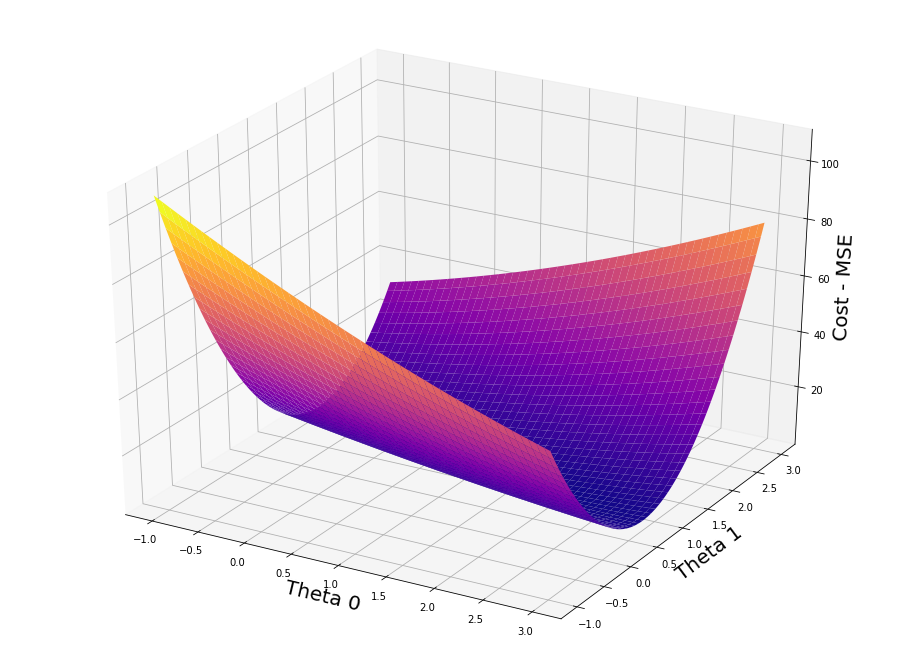

In [124]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.plasma)

plt.show()

In [113]:
print('Min value of plot_cost: ',plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j): ',ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]: ',plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]: ',plot_t1[111][91])

Min value of plot_cost:  0.9483826526747163
Min occurs at (i, j):  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]:  0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]:  1.2311557788944723


## Partial derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum^{n}_{i=1} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum^{n}_{i=1} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [119]:
def grad(x, y, thetas):
    n=y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0],theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [120]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collect data for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# results
print('Min occurs at Theta 0:',thetas[0])
print('Min occurs at Theta 1:',thetas[1])
print('MSE is: ',mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is:  [0.94797511]


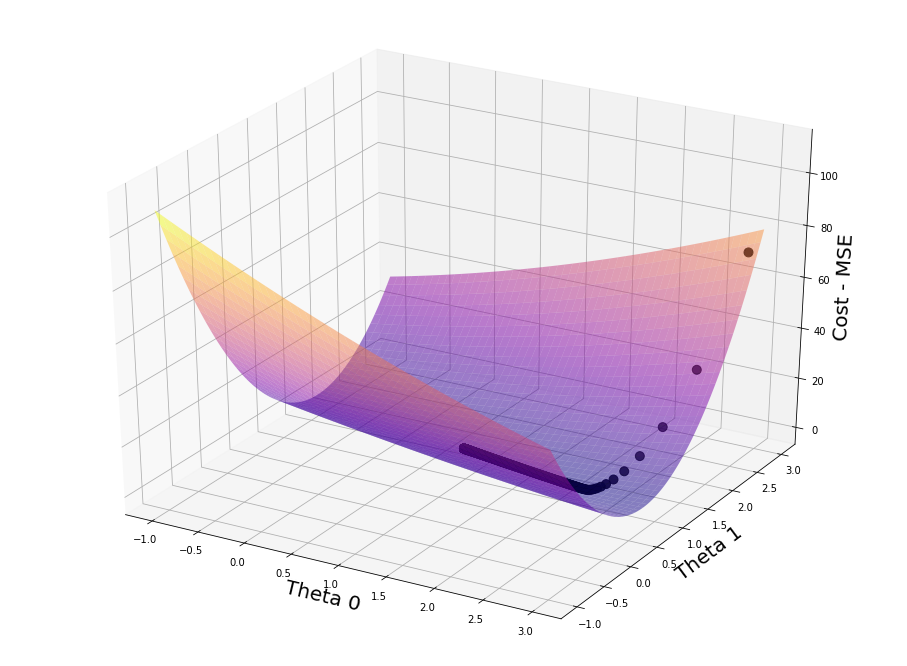

In [125]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, color='black', s=80)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.plasma, alpha=0.5)

plt.show()